# My Car (Speed - Distance) Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mycar.csv", index_col=0)
df.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


## Exploratory Data Analysis

In [3]:
df.shape

(50, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   speed   50 non-null     int64
 1   dist    50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [5]:
df.describe(include='all')

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


## Dividing the dataset into feature and target variables

In [6]:
x = df.speed.values
y = df.dist.values

In [7]:
x

array([ 4,  4,  7,  7,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13,
       13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18,
       18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25],
      dtype=int64)

In [8]:
y

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85], dtype=int64)

## Visual Exploratory Data Analysis

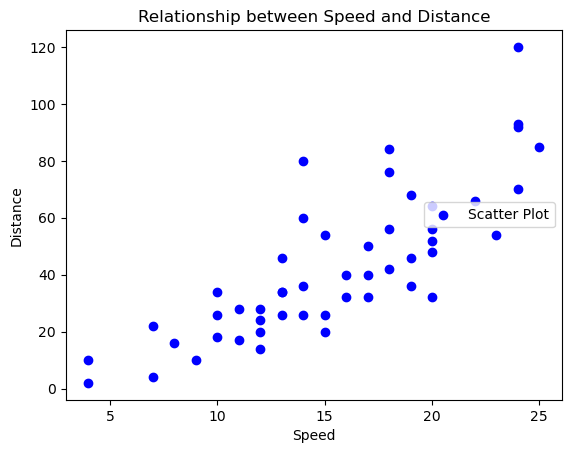

In [9]:
plt.scatter(x, y, color='blue', label='Scatter Plot')
plt.title('Relationship between Speed and Distance')
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.legend(loc=5)
plt.show()

## Checking dimensions of X and Y

In [10]:
print(x.shape)
print(y.shape)

(50,)
(50,)


## Reshaping X and Y to train the model

In [11]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
print(x.shape)
print(y.shape)

(50, 1)
(50, 1)


## Split X and Y into training and testing sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=64)

# Printing the dimensions of X_train,X_test,y_train,y_test
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((40, 1), (10, 1), (40, 1), (10, 1))

## Model Implementation

In [13]:
# Createing instance of Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Training the model
lm.fit(X_train, Y_train)

# Predicting on test data
Y_pred = lm.predict(X_test)

## Model slope and intercept term

In [14]:
# Slope And Intercept

print("Estmated model slope:", lm.coef_)
print("Estmated model intercept:", lm.intercept_)

Estmated model slope: [[3.98404002]]
Estmated model intercept: [-17.98161029]


In [15]:
# Single Prediction

lm.predict([[20]])

array([[61.69919009]])

## Evaluation (Metrics)

#### Root Mean Square Error

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 12.6735


#### R2 Score

In [17]:
from sklearn.metrics import r2_score
print("R2 score value: {:.4f}".format(r2_score(Y_test, Y_pred)))

R2 score value: 0.7373


## Ploting the Regression Line

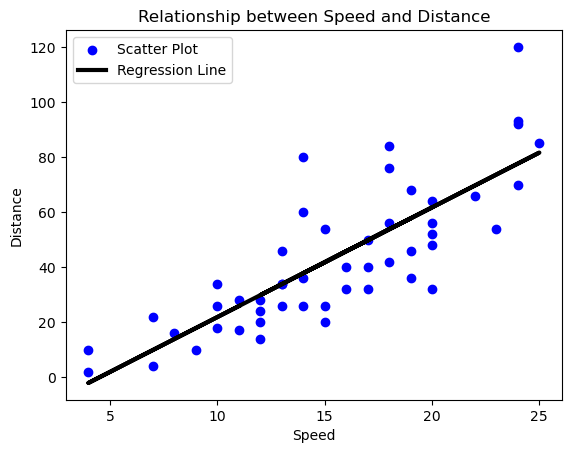

In [18]:
plt.scatter(x, y, color='blue', label='Scatter Plot')
plt.plot(X_test, Y_pred, color='black', linewidth=3, label= 'Regression Line')
plt.title('Relationship between Speed and Distance')
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.legend() 
plt.show()